#Automate Neural Network Hyperparameters Imp. with Functions:

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Load MNIST dataset
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# Normalize the pixel values to the range [0, 1]
X_train_full, X_test = X_train_full / 255.0, X_test / 255.0

# Split the training data into training and validation sets
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

def build_mnist_model(n_hidden=1, n_neurons=30, learning_rate=3e-3):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))  # Flatten the input image
    for _ in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(10, activation="softmax"))  # Output layer with 10 neurons for 10 classes
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

mnist_model = build_mnist_model()
mnist_model.fit(X_train, y_train, epochs=100,
                validation_data=(X_valid, y_valid),
                callbacks=[keras.callbacks.EarlyStopping(patience=10)])
test_loss, test_accuracy = mnist_model.evaluate(X_test, y_test)
y_pred = mnist_model.predict(X_train)

Epoch 1/100
1719/1719 [==============================] - 4s 2ms/step - loss: 1.3169 - accuracy: 0.6652 - val_loss: 0.7171 - val_accuracy: 0.8420
Epoch 2/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5915 - accuracy: 0.8560 - val_loss: 0.4808 - val_accuracy: 0.8786
Epoch 3/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4598 - accuracy: 0.8781 - val_loss: 0.4060 - val_accuracy: 0.8952
Epoch 4/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4064 - accuracy: 0.8887 - val_loss: 0.3673 - val_accuracy: 0.9058
Epoch 5/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3755 - accuracy: 0.8959 - val_loss: 0.3432 - val_accuracy: 0.9092
Epoch 6/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3546 - accuracy: 0.9012 - val_loss: 0.3269 - val_accuracy: 0.9120
Epoch 7/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3389 - accuracy: 0.9050 - val_loss: 0.3131 - val_ac

#Hypertunning

#1. Hyperopt

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from hyperopt import hp, tpe, fmin, Trials
from sklearn.metrics import accuracy_score

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten images to 1D arrays
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Number of classes
num_classes = 10

# Define hyperparameter search space (reduced)
space = {
    'learning_rate': hp.loguniform('learning_rate', np.log(0.001), np.log(0.1)),
    'units': hp.choice('units', [64, 128, 256])
}

# Define objective function
def objective(params):
    model = Sequential([
        Dense(params['units'], activation='relu', input_shape=(784,)),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])

    optimizer = Adam(learning_rate=params['learning_rate'])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    model.fit(x_train, y_train, epochs=5, batch_size=128, verbose=0)

    _, accuracy = model.evaluate(x_test, y_test, verbose=0)
    return -accuracy  # Minimize negative accuracy (maximize accuracy)

# Perform hyperparameter optimization
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10,
            trials=trials)

print("Best Hyperparameters:", best)

  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



100%|██████████| 10/10 [03:17<00:00, 19.76s/trial, best loss: -0.9804999828338623]
Best Hyperparameters: {'learning_rate': 0.0029642458049597095, 'units': 2}


#Vanishing/Exploding Gradients Problems

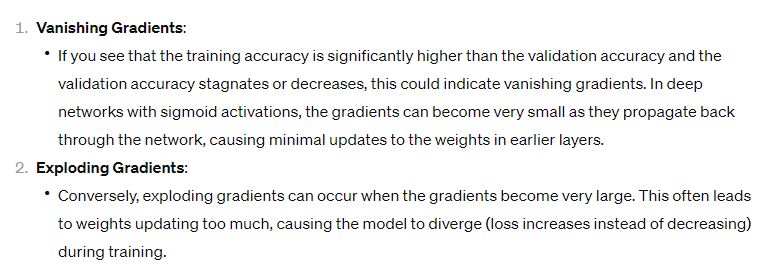

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.initializers import GlorotUniform

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Flatten the images from 28x28 to 784-dimensional vectors
train_images = train_images.reshape((60000, 784))
test_images = test_images.reshape((10000, 784))

In [ ]:
def create_model():
    model = Sequential()

    # Adding layers with sigmoid activation that can lead to vanishing gradients
    model.add(Dense(256, activation='sigmoid', input_shape=(784,)))
    model.add(Dense(256, activation='sigmoid'))
    model.add(Dense(256, activation='sigmoid'))
    model.add(Dense(256, activation='sigmoid'))

    # Output layer for 10 classes (digits 0-9) with softmax activation
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    optimizer = SGD(learning_rate=0.01)  # Specify learning_rate instead of lr
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model
# Create the model
model = create_model()
model.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_63 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 400,906 (1.53 MB)

 Trainable params: 400,906 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.1084 - loss: 2.3152 - val_accuracy: 0.1079 - val_loss: 2.3045
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.1078 - loss: 2.3055 - val_accuracy: 0.1081 - val_loss: 2.3032
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1124 - loss: 2.3037 - val_accuracy: 0.0998 - val_loss: 2.3050
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1121 - loss: 2.3027 - val_accuracy: 0.0995 - val_loss: 2.2993
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1167 - loss: 2.3017 - val_accuracy: 0.1060 - val_loss: 2.2999
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.1158 - loss: 2.3003 - val_accuracy: 0.1060 - val_loss: 2.2975
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1191 - loss: 2.2983 - val_accuracy: 0.1060 - val_loss: 2.3014
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1285 - loss: 2.29

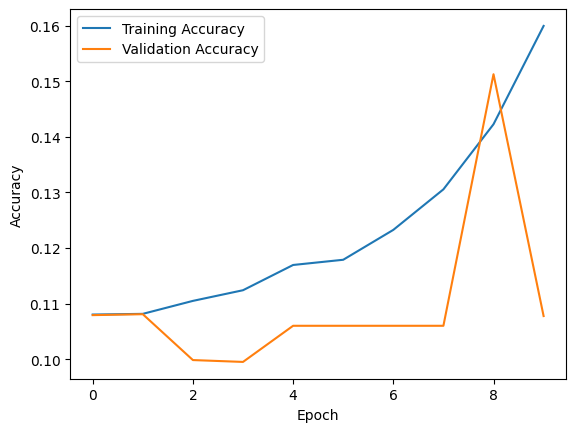

In [ ]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Glorot and He Initialization

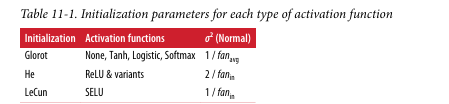

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.initializers import GlorotUniform, HeUniform, LecunUniform, RandomNormal
from tensorflow.keras.activations import relu, elu, selu

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images = train_images.reshape((60000, 784))
test_images = test_images.reshape((10000, 784))

def create_model():
    model = Sequential()

    # Adding layers with improved activation functions and initializers
    model.add(Dense(256, activation=relu, kernel_initializer=GlorotUniform(), input_shape=(784,)))
    model.add(Dense(256, activation=relu, kernel_initializer=HeUniform()))
    model.add(Dense(256, activation=elu, kernel_initializer=LecunUniform()))
    model.add(Dense(256, activation=selu, kernel_initializer=RandomNormal(mean=0.0, stddev=1.0)))

    # Output layer for 10 classes (digits 0-9) with softmax activation
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    optimizer = SGD(learning_rate=0.01)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Create the model
model = create_model()
model.summary()

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_68 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 400,906 (1.53 MB)

 Trainable params: 400,906 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8580 - loss: 0.5988 - val_accuracy: 0.9538 - val_loss: 0.1573
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9660 - loss: 0.1124 - val_accuracy: 0.9604 - val_loss: 0.1310
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9793 - loss: 0.0687 - val_accuracy: 0.9676 - val_loss: 0.1121
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9880 - loss: 0.0423 - val_accuracy: 0.9676 - val_loss: 0.1089
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9921 - loss: 0.0271 - val_accuracy: 0.9667 - val_loss: 0.1157
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9959 - loss: 0.0170 - val_accuracy: 0.9728 - val_loss: 0.1085
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9980 - loss: 0.0100 - val_accuracy: 0.9724 - val_loss: 0.1103
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9993 - loss: 0.0

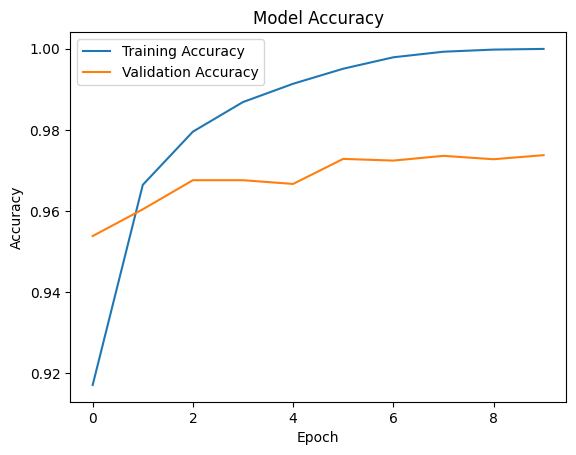

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()